In [3]:
import os # processing file path
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

data1=pd.read_csv(r"C:\Users\Anjishnu Satpathy\Downloads\Week-4-Project\Week-4-Project\fashion-mnist_train.csv")
data2=pd.read_csv(r"C:\Users\Anjishnu Satpathy\Downloads\Week-4-Project\Week-4-Project\fashion-mnist_test.csv")



In [4]:
y_test=data2["label"]
y_train=data1["label"]
x_test=data2.drop(["label"],axis=1)
x_train=data1.drop(["label"],axis=1)

y_test=np.array(y_test)
y_train=np.array(y_train)
x_test=np.array(x_test)
x_train=np.array(x_train)

In [5]:
m,n=x_train.shape

In [6]:
y_train.shape

(60000,)

C:\Users\Anjishnu Satpathy\AppData\Local\Temp\ipykernel_15744\1801725100.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


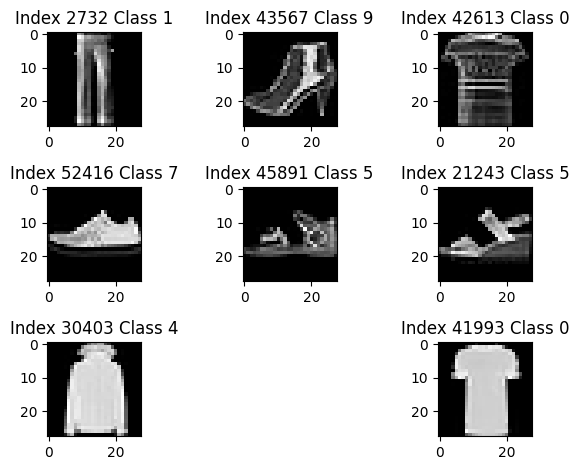

In [7]:
# random check with nine training examples
np.random.seed(0);
indices = list(np.random.randint(m,size=9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))
    plt.tight_layout()


In [8]:
print("Feature Values: \nFrom " + str(np.min(x_train)) + " to " + str(np.max(x_train)))
print("Data type: " + str(x_train.dtype))
print("\nLabel Values: ")
print(set(list(y_train)))
print("Data type: " + str(y_train.dtype))

Feature Values: 
From 0 to 255
Data type: int64

Label Values: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Data type: int64


In [9]:
def f(z):
    return 1 / (1 + np.exp(-z))

n_hidden_node = 10
n_output_node = 9
learning_rate = 0.05
# initilize with random numbers for weight and bias matrix

w1 = np.random.randn(784, n_hidden_node)
b1 = np.zeros((1, n_hidden_node))
w2 = np.random.randn(n_hidden_node, n_output_node)
b2 = np.zeros((1, n_output_node))

for i in range(5000):
    
    # forward feed
    z1 = np.dot(x_train, w1) + b1
    h1 = f(z1)
    z2 = np.dot(h1, w2) + b2
    h2 = f(z2)
    
    j=(h2-y_train)**2

    # backward propagation
    delta2 = (h2-y_train)*h2*(1-h2)
    delta1 = np.dot(delta2, w2.T) * h1*(1 - h1)
    dw2 = np.dot(h1.T, delta2)
    db2 = np.sum(delta2, axis=0).reshape(np.shape(b2))
    dw1 = np.dot(x.T, delta1)
    db1 = np.sum(delta1, axis=0).reshape(np.shape(b1))

    # adjust weights by gradient descent
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
        
    plt.plot(j,i,color='b',marker='o',s=30)
    plt.show()    

C:\Users\Anjishnu Satpathy\AppData\Local\Temp\ipykernel_15744\628423679.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


ValueError: operands could not be broadcast together with shapes (60000,9) (60000,) 

In [10]:
def nn_predict(model, x_test):
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    z1 = np.dot(x, w1) + b1
    h1 = f(z1)
    z2 = np.dot(h1, w2) + b2
    h2 = f(z2)
    return np.round(h2)

nn_predit(x_test)

NameError: name 'nn_predit' is not defined

In [ ]:
def mse(y,y_hat):
       return np.mean((y-y_hat)**2)
    
error=mse(nn_predict(x_test),y_test)    